In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv('/content/IRIS.csv')

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:

def verify_eda_info(df):
    """Verifies key Exploratory Data Analysis (EDA) steps for a given DataFrame."""

    report = {}

    # Check for missing values
    report['missing_values'] = df.isnull().sum().to_dict()

    # Check for duplicate rows
    report['duplicate_rows'] = df.duplicated().sum()

    # Summary statistics (only for numeric columns)
    report['summary_statistics'] = df.describe(include=[np.number]).to_dict()

    # Data types
    report['data_types'] = df.dtypes.apply(lambda x: x.name).to_dict()

    # Unique values count per column
    report['unique_values'] = df.nunique().to_dict()

    # Outlier detection (Using IQR method for numeric columns)
    outliers = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    report['outliers'] = outliers

    # Correlation matrix (only numeric columns)
    if not numeric_cols.empty:
        report['correlation_matrix'] = df[numeric_cols].corr().to_dict()
    else:
        report['correlation_matrix'] = "No numeric columns for correlation"

    return report




eda_report = verify_eda_info(df)
eda_report

{'missing_values': {'sepal_length': 0,
  'sepal_width': 0,
  'petal_length': 0,
  'petal_width': 0,
  'species': 0},
 'duplicate_rows': 3,
 'summary_statistics': {'sepal_length': {'count': 150.0,
   'mean': 5.843333333333334,
   'std': 0.8280661279778629,
   'min': 4.3,
   '25%': 5.1,
   '50%': 5.8,
   '75%': 6.4,
   'max': 7.9},
  'sepal_width': {'count': 150.0,
   'mean': 3.0540000000000003,
   'std': 0.4335943113621737,
   'min': 2.0,
   '25%': 2.8,
   '50%': 3.0,
   '75%': 3.3,
   'max': 4.4},
  'petal_length': {'count': 150.0,
   'mean': 3.758666666666666,
   'std': 1.7644204199522617,
   'min': 1.0,
   '25%': 1.6,
   '50%': 4.35,
   '75%': 5.1,
   'max': 6.9},
  'petal_width': {'count': 150.0,
   'mean': 1.1986666666666668,
   'std': 0.7631607417008414,
   'min': 0.1,
   '25%': 0.3,
   '50%': 1.3,
   '75%': 1.8,
   'max': 2.5}},
 'data_types': {'sepal_length': 'float64',
  'sepal_width': 'float64',
  'petal_length': 'float64',
  'petal_width': 'float64',
  'species': 'object'},
 

<Figure size 1000x600 with 0 Axes>

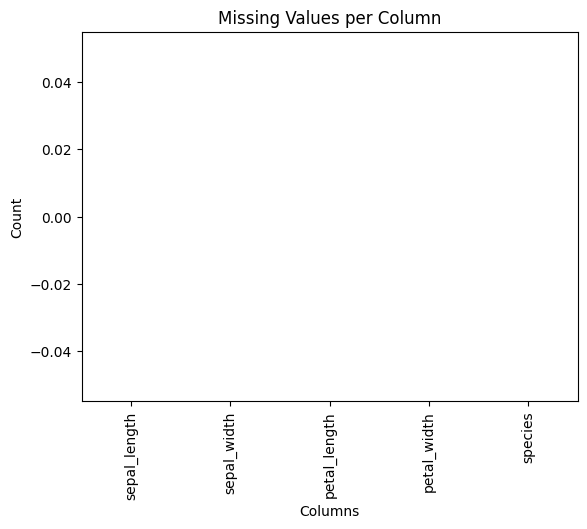

Number of duplicate rows: 3
Summary Statistics:
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5

Data Types:
                 Type
sepal_length  float64
sepal_width   float64
petal_length  float64
petal_width   float64
species        object


<Figure size 1000x600 with 0 Axes>

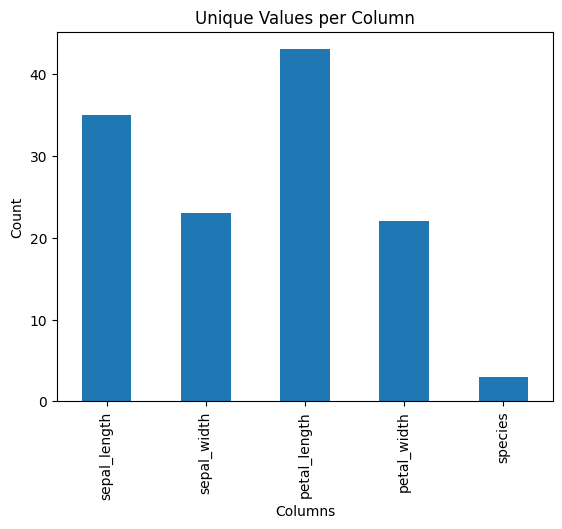

<Figure size 1000x600 with 0 Axes>

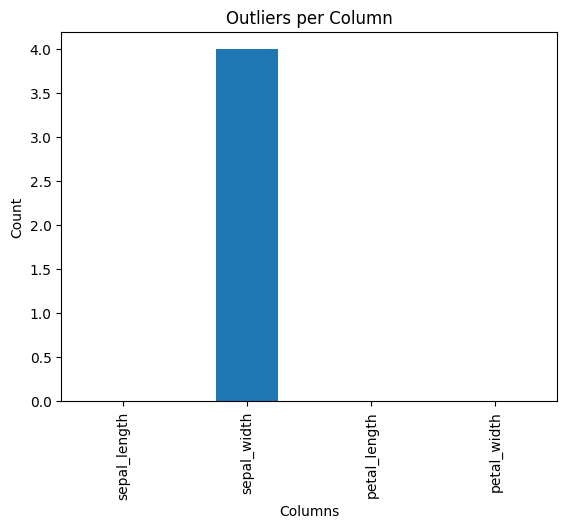

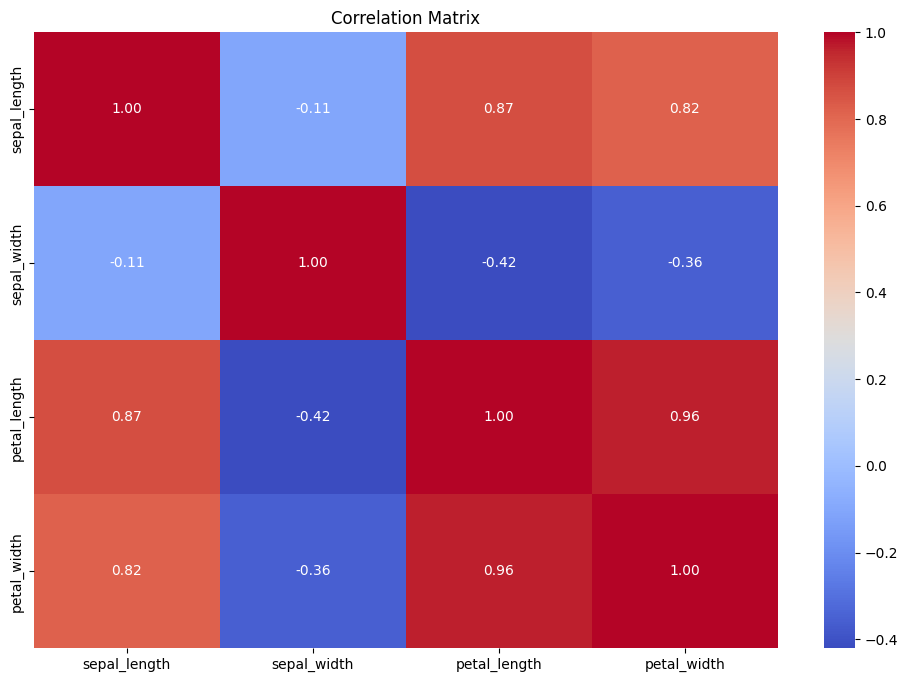

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def visualize_eda_report(eda_report, df):
    # Missing Values
    missing_values = pd.DataFrame.from_dict(eda_report['missing_values'], orient='index', columns=['Count'])
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', legend=False)
    plt.title('Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    # Duplicate Rows
    print(f"Number of duplicate rows: {eda_report['duplicate_rows']}")

    # Summary Statistics
    summary_stats = pd.DataFrame.from_dict(eda_report['summary_statistics'])
    print("Summary Statistics:")
    print(summary_stats.transpose())

    # Data Types
    data_types = pd.DataFrame.from_dict(eda_report['data_types'], orient='index', columns=['Type'])
    print("\nData Types:")
    print(data_types)

    # Unique Values
    unique_values = pd.DataFrame.from_dict(eda_report['unique_values'], orient='index', columns=['Count'])
    plt.figure(figsize=(10, 6))
    unique_values.plot(kind='bar', legend=False)
    plt.title('Unique Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    # Outliers
    outliers = pd.DataFrame.from_dict(eda_report['outliers'], orient='index', columns=['Count'])
    plt.figure(figsize=(10, 6))
    outliers.plot(kind='bar', legend=False)
    plt.title('Outliers per Column')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    # Correlation Matrix
    if isinstance(eda_report['correlation_matrix'], dict):
        correlation_matrix = pd.DataFrame.from_dict(eda_report['correlation_matrix'])
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix')
        plt.show()
    else:
        print("No numeric columns for correlation matrix.")

# Example usage
# Assuming 'df' is your DataFrame and 'eda_report' is the report generated by verify_eda_info(df)
visualize_eda_report(eda_report, df)


In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [23]:
X = df.drop('species', axis=1)
y = df['species']


In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
print(y.unique())

[0 1 2]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [43]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs' , C=0.01)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.01, multi_class='multinomial')

In [44]:
y_pred = model.predict(X_test)

In [45]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


print("Classification Report:\n", classification_report(y_test , y_pred))


Accuracy: 0.93
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [46]:


scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 0.86 ± 0.08


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [48]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred_dt = dt.predict(X_test)

In [50]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



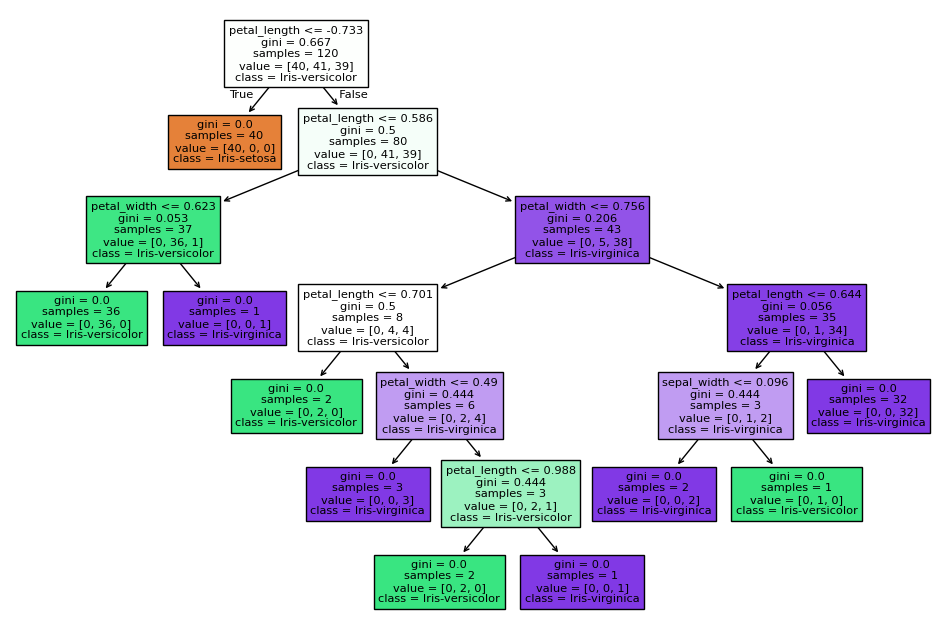

In [53]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

In [61]:
dt_ft_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
dt_ft_importance = ft_importance.sort_values(by='Importance', ascending=False)

In [62]:
dt_ft_importance

,Feature,Importance
2,petal_length,0.906143
3,petal_width,0.077186
1,sepal_width,0.016670
0,sepal_length,0.000000


In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf_model.predict(X_test)

In [60]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [63]:
rf_ft_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_ft_importance = rf_ft_importance.sort_values(by='Importance', ascending=False)

In [64]:
rf_ft_importance

,Feature,Importance
2,petal_length,0.439994
3,petal_width,0.421522
0,sepal_length,0.108098
1,sepal_width,0.030387


In [72]:
rf_model_v2 = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=2 , min_samples_leaf=2 , min_samples_split=5)
rf_model_v2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [73]:
y_pred_rf_v2 = rf_model_v2.predict(X_test)

In [74]:
accuracy_rf_v2 = accuracy_score(y_test, y_pred_rf_v2)
print(f"Random Forest Accuracy: {accuracy_rf_v2:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_v2))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_v2))

Random Forest Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [75]:
cv_scores_rf_v2 = cross_val_score(rf_model_v2, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores_rf_v2.mean():.2f} ± {cv_scores_rf_v2.std():.2f}")

Cross-Validation Accuracy: 0.95 ± 0.03


In [79]:
SVM_model = SVC(kernel='linear' , random_state=42)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [80]:
y_pred_svm = SVM_model.predict(X_test)

In [81]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.97
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [82]:
SVM_rbf_model = SVC(kernel='rbf' , random_state=42 , C=0.1 , gamma= 'scale')
SVM_rbf_model.fit(X_train, y_train)

SVC(C=0.1, random_state=42)

In [83]:
y_pred_svm_rbf = SVM_rbf_model.predict(X_test)

In [84]:
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"SVM RBF Accuracy: {accuracy_svm_rbf:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))

SVM RBF Accuracy: 0.97
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [86]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred_knn = knn_model.predict(X_test)

In [88]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
knn_model_manhattan = KNeighborsClassifier(n_neighbors=5 , metric='manhattan')
knn_model_manhattan.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [90]:
y_pred_knn_manhattan = knn_model_manhattan.predict(X_test)

In [91]:
accuracy_knn_manhattan = accuracy_score(y_test, y_pred_knn_manhattan)
print(f"K-Nearest Neighbors Manhattan Accuracy: {accuracy_knn_manhattan:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_manhattan))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_manhattan))

K-Nearest Neighbors Manhattan Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [92]:
knn_model_minkowski = KNeighborsClassifier(n_neighbors=10 , metric='minkowski' , p=3)
knn_model_minkowski.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=3)

In [93]:
y_pred_knn_minkowski = knn_model_minkowski.predict(X_test)

In [94]:
accuracy_knn_minkowski = accuracy_score(y_test, y_pred_knn_minkowski)
print(f"K-Nearest Neighbors Minkowski Accuracy: {accuracy_knn_minkowski:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_minkowski))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_minkowski))

K-Nearest Neighbors Minkowski Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [95]:
knn_model_chebyshev = KNeighborsClassifier(n_neighbors=10 , metric='chebyshev')
knn_model_chebyshev.fit(X_train, y_train)

KNeighborsClassifier(metric='chebyshev', n_neighbors=10)

In [96]:
y_pred_knn_chebyshev = knn_model_chebyshev.predict(X_test)

In [97]:
accuracy_knn_chebyshev = accuracy_score(y_test, y_pred_knn_chebyshev)
print(f"K-Nearest Neighbors Chebyshev Accuracy: {accuracy_knn_chebyshev:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_chebyshev))
print("Classification Report:\n", classification_report(y_test, y_pred_knn_chebyshev))

K-Nearest Neighbors Chebyshev Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [99]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42 , activation='relu')
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=42)

In [100]:
y_pred_mlp = mlp_model.predict(X_test)

In [101]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [115]:
mlp_model_v2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=1000, random_state=42 , activation='relu' , alpha=0.1 , early_stopping=True)
mlp_model_v2.fit(X_train, y_train)

MLPClassifier(alpha=0.1, early_stopping=True, hidden_layer_sizes=5,
              max_iter=1000, random_state=42)

In [116]:
accuracy_mlp_v2 = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp_v2:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [118]:
cross_val_scores = cross_val_score(mlp_model, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [1.         0.96666667 0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [119]:
!pip install xgboost

In [122]:
xgb_model= xgb.XGBClassifier(random_state=42 , n_estimators=100 , learning_rate= 0.1 )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [123]:
y_pred_xgb = xgb_model.predict(X_test)

In [124]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



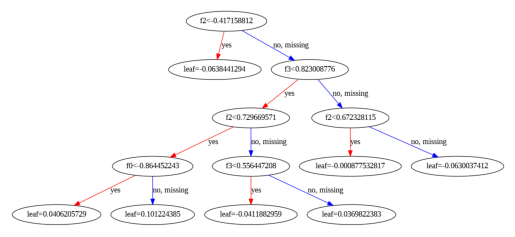

In [127]:

xgb.plot_tree(xgb_model, num_trees=10)
plt.show()


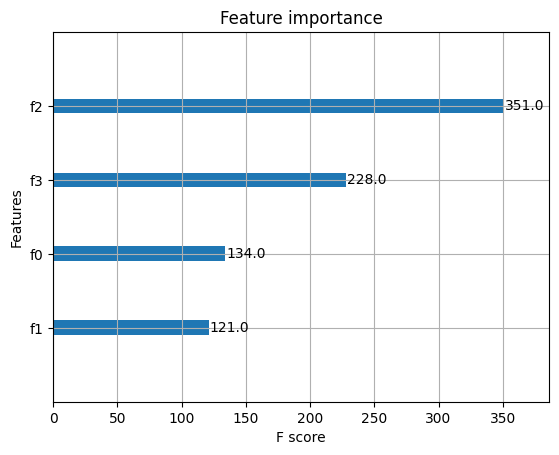

In [128]:
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.show()


In [129]:
!pip install graphviz

In [130]:
import graphviz

dot = xgb.to_graphviz(xgb_model, num_trees=0)
dot.render("tree_visualization", view=True)

'tree_visualization.pdf'

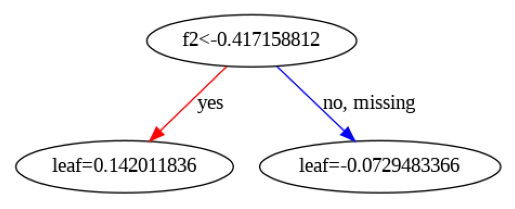

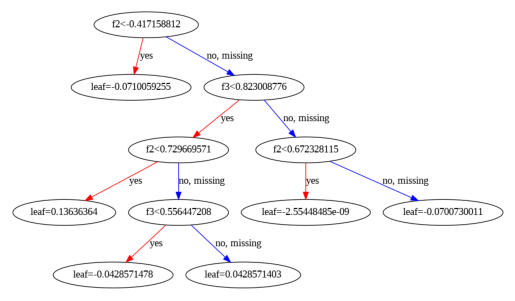

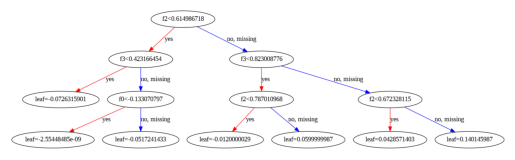

In [131]:
for i in range(3):
    xgb.plot_tree(xgb_model, num_trees=i)
    plt.show()

In [141]:
xgb_model_tuned = xgb.XGBClassifier(
    random_state=42,
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=2,
    alpha=0.1,
    lambda_=1
)

xgb_model_tuned.fit(X_train, y_train)

y_pred_xgb_tuned = xgb_model_tuned.predict(X_test)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Tuned XGBoost Accuracy: {accuracy_xgb_tuned:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_tuned))


Tuned XGBoost Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:15:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


<ipython-input-142-5690c5476445>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Accuracy', y='Model', data=model_performance, palette="viridis")


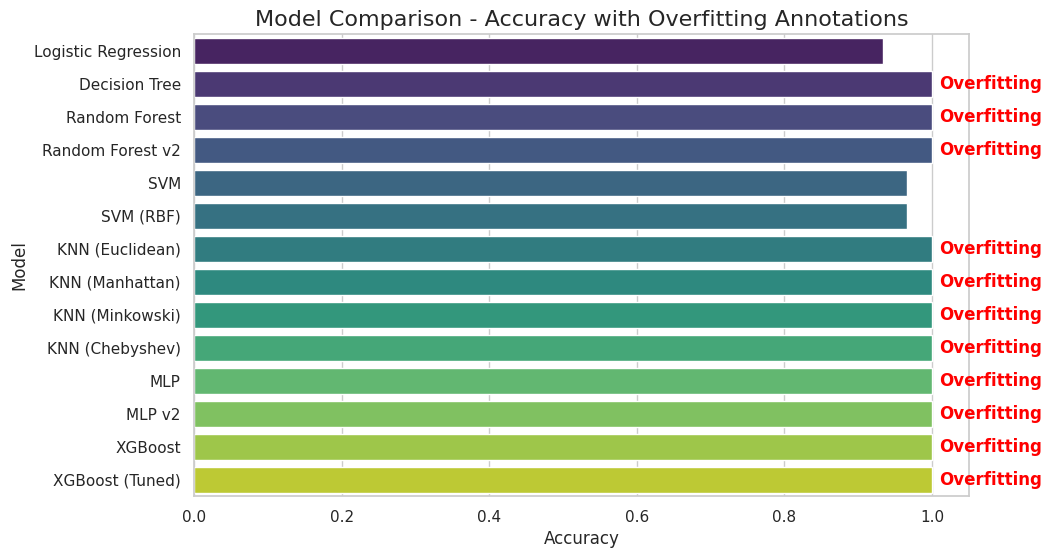

In [142]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Random Forest v2',
               'SVM', 'SVM (RBF)', 'KNN (Euclidean)', 'KNN (Manhattan)', 'KNN (Minkowski)',
               'KNN (Chebyshev)', 'MLP', 'MLP v2', 'XGBoost', 'XGBoost (Tuned)']

accuracies = [accuracy, accuracy_dt, accuracy_rf, accuracy_rf_v2,
              accuracy_svm, accuracy_svm_rbf, accuracy_knn, accuracy_knn_manhattan,
              accuracy_knn_minkowski, accuracy_knn_chebyshev, accuracy_mlp, accuracy_mlp_v2,
              accuracy_xgb, accuracy_xgb_tuned]

model_performance = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(x='Accuracy', y='Model', data=model_performance, palette="viridis")

for i, accuracy in enumerate(accuracies):
    if accuracy == 1.0:
        barplot.text(accuracy + 0.01, i, 'Overfitting', color='red', va='center', ha='left', fontweight='bold')

plt.title('Model Comparison - Accuracy with Overfitting Annotations', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)

plt.show()
